In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # will plot the confusion matrix

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

pd.set_option('display.max_columns', None)

In [17]:
# # import the csvs!
# # 82k normalized 100/175:
# df_82k = pd.read_csv('csv files/82k_normalized_cats_train_test_split.csv', index_col = 0)

# # 82k not normalized 100/175:
# df_82k_nn = pd.read_csv('csv files/82k_not_normalized_cats_train_test_split.csv', index_col = 0)

# # 250k normalized 100/500:
# df_250k_100_500 = pd.read_csv('csv files/250k_normalized_cats_train_test_split_100_500.csv', index_col = 0)

# # 250k normalized 250/5000:
# df_250k_250_5000 = pd.read_csv('csv files/250k_normalized_cats_train_test_split_250_5000.csv', index_col = 0)

# 250k normalized 500/10000:
train = pd.read_csv('../../data/usnw_nb15/train.csv', index_col = 0)
test = pd.read_csv('../../data/usnw_nb15/test.csv', index_col = 0)

# ! @@@@ when pipeline pulling in this file, all it is is the raw dataset with normalized steps, replace with train/test.csv with USNW
# ! @@@@ train csv has test dataset and test has train dataset... wtf?
# ! @@@@ they used only test back in the day, use traintest split function and it'll do it automatically!

In [19]:
# # call run_it_all

# # 82k normalized:
# mp_82k_anom = run_it_all(df_82k)
# mp_82k_anom.to_csv('Model_Performance_82k_anom.csv')

# # 82k not normalized:
# mp_82k_anom_nn = run_it_all(df_82k_nn)
# mp_82k_anom_nn.to_csv('Model_Performance_82k_Not_Normalized_anom.csv')

# # 250k normalized 100/500:
# mp_250k_anom_100_500 = run_it_all(df_250k_100_500)
# mp_250k_anom_100_500.to_csv('csv files/Model Performances/250k/Model_Performance_250k_100_500_Normalized_anom.csv')

# # 250k normalized 250/5000:
# mp_250k_anom_250_5000 = run_it_all(df_250k_250_5000)
# mp_250k_anom_250_5000.to_csv('csv files/Model Performances/250k/Model_Performance_250k_250_5000_Normalized_anom.csv')

# 250k normalized 500/10000:
# mp_250k_anom_500_10000 = run_it_all({"train":train, "test":test})
# mp_250k_anom_500_10000.to_csv('csv files/Model Performances/250k/Model_Performance_250k_500_10000_Normalized_anom.csv')

In [20]:
# mp_250k_anom_500_10000.to_csv('csv files/Model Performances/250k/Model_Performance_250k_500_10000_Normalized_anom.csv')

In [21]:
# confusion matrix and decision tree
data_train = train
data_test = test
x_train = data_train.loc[:, :'state_RST']
x_test = data_test.loc[:, :'state_RST']
y_train_class = data_train.iloc[:, -2]
y_test_class = data_test.iloc[:, -2]
# decision_tree(X_train, X_test, y_train)
model, y_predictions = decision_tree(x_train, x_test, y_train_class)
confusion_matrix_plot(model, y_test_class, y_predictions)

            dur proto service state  spkts  dpkts  sbytes  dbytes  \
id                                                                  
1      0.000011   udp       -   INT      2      0     496       0   
2      0.000008   udp       -   INT      2      0    1762       0   
3      0.000005   udp       -   INT      2      0    1068       0   
4      0.000006   udp       -   INT      2      0     900       0   
5      0.000010   udp       -   INT      2      0    2126       0   
...         ...   ...     ...   ...    ...    ...     ...     ...   
82328  0.000005   udp       -   INT      2      0     104       0   
82329  1.106101   tcp       -   FIN     20      8   18062     354   
82330  0.000000   arp       -   INT      1      0      46       0   
82331  0.000000   arp       -   INT      1      0      46       0   
82332  0.000009   udp       -   INT      2      0     104       0   

                rate  sttl  dttl         sload        dload  sloss  dloss  \
id                       

KeyError: 'state_RST'

In [ ]:
# look at random forest specifically on the normals
df_250k_500_10000_normal = df_250k_500_10000.drop(df_250k_500_10000[df_250k_500_10000['label'] == 1].index).reset_index(drop=True)
df_250k_500_10000_normal = df_250k_500_10000_normal.drop('rate', axis = 1)
data_train = df_250k_500_10000_normal.drop(df_250k_500_10000_normal[df_250k_500_10000_normal['train_test'] == 1].index).reset_index(drop=True)
data_test = df_250k_500_10000_normal.drop(df_250k_500_10000_normal[df_250k_500_10000_normal['train_test'] == 0].index).reset_index(drop=True)
x_train = data_train.loc[:, :'state_RST']
x_test = data_test.loc[:, :'state_RST']
y_train_class = data_train.iloc[:, -2]
y_test_class = data_test.iloc[:, -2]

rf_model, y_predicitons_rf = random_forest(x_train, x_test, y_train_class)

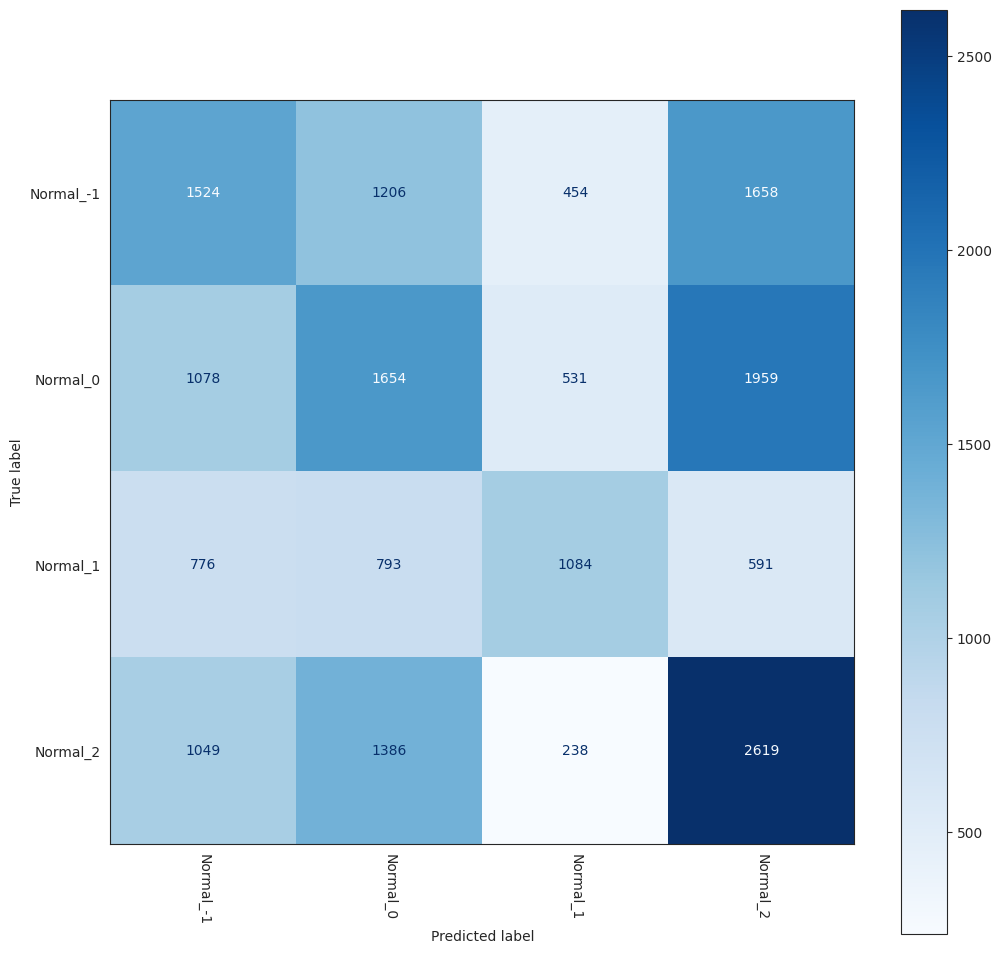

In [ ]:
confusion_matrix_plot(rf_model, y_test_class, y_predicitons_rf)

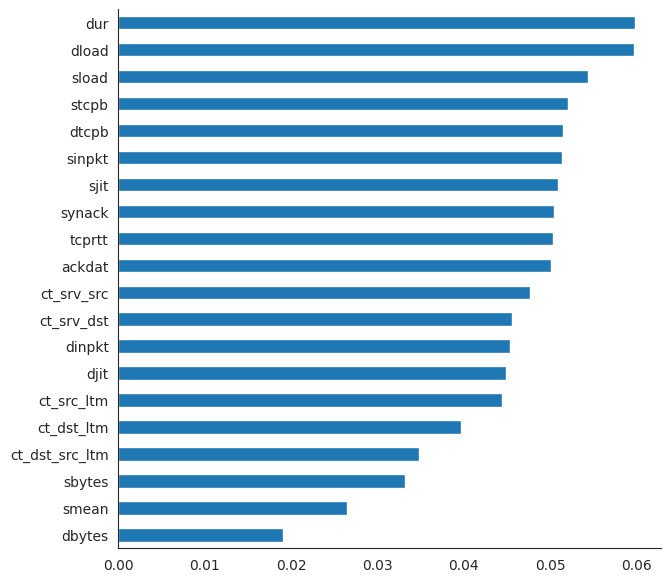

In [ ]:
# feature importance on the normal traffic
x = df_250k_500_10000_normal.loc[:, :'state_RST']
feature_importance_plot(x, rf_model)